/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


1:['Visual', 'Studio', '2019', 'crashing', 'when', 'click', 'RMB', 'on', 'rule', 'in', "Analyzers'", 'dependencies']
1:['Avoid', 'crash', 'on', 'concat', 'on', 'structs', 'with', 'ToString', 'member']
0:['Enum', 'implicit', 'cast', 'to', 'string', 'fails', 'when', 'element', 'is', 'named', 'ToString']
0:['Enum', 'with', 'ToString', 'member', 'crashes', 'in', 'string', 'concatenation']
1:['Crash', 'on', 'right', 'click', 'a', 'Analyze', 'rule', 'in', 'Solution-Explorer']
0:['Handle', 'lazy', 'loading', 'of', 'analyzer', 'command', 'handlers']


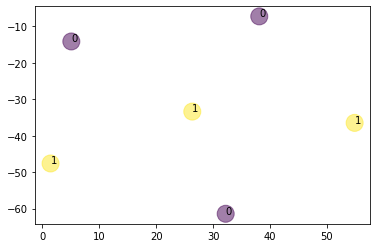

In [16]:
from gensim.models import Word2Vec
  
from nltk.cluster import KMeansClusterer
import nltk
import numpy as np 
  
from sklearn import cluster
from sklearn import metrics
  
# training data
sentences = [
    ["Visual", "Studio", "2019","crashing", "when", "click", "RMB", "on", "rule", "in", "Analyzers'", "dependencies"],#https://github.com/dotnet/roslyn/issues/40720
    ["Avoid", "crash", "on", "concat", "on", "structs", "with", "ToString", "member"], #https://github.com/dotnet/roslyn/pull/38860/commits
    ["Enum", "implicit", "cast", "to", "string", "fails", "when", "element", "is", "named", "ToString"], #"https://github.com/dotnet/roslyn/issues/40256
    ["Enum", "with", "ToString", "member", "crashes", "in", "string", "concatenation"], #https://github.com/dotnet/roslyn/issues/38858   
    ["Crash", "on", "right", "click", "a", "Analyze", "rule", "in", "Solution-Explorer"], #https://github.com/dotnet/roslyn/issues/36304
    ["Handle", "lazy", "loading", "of", "analyzer", "command", "handlers"] #https://github.com/dotnet/roslyn/pull/36740
]
 
model = Word2Vec(sentences, min_count=1)
 
  
def sent_vectorizer(sent, model):
    sent_vec =[]
    numw = 0
    for w in sent:
        try:
            if numw == 0:
                sent_vec = model[w]
            else:
                sent_vec = np.add(sent_vec, model[w])
            numw+=1
        except:
            pass
     
    return np.asarray(sent_vec) / numw
  
  
X=[]
for sentence in sentences:
    X.append(sent_vectorizer(sentence, model))   
 
print ("========================")

 
  
 
# note with some version you would need use this (without wv) 
#  model[model.vocab] 
#print (model[model.wv.vocab])
 #print (model.most_similar(positive=['lazy'], negative=[], topn=2))
  
  
 
  
  
NUM_CLUSTERS=2
kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.cosine_distance, repeats=25)
assigned_clusters = kclusterer.cluster(X, assign_clusters=True)
#print ("assigned_clusters  : ", assigned_clusters)
  
  
for index, sentence in enumerate(sentences):    
    print (str(assigned_clusters[index]) + ":" + str(sentence))
     
kmeans = cluster.KMeans(n_clusters=NUM_CLUSTERS)
kmeans.fit(X)

 
 
from sklearn.manifold import TSNE
 
model = TSNE(n_components=2, random_state=0)
np.set_printoptions(suppress=True)
 
Y=model.fit_transform(X)
 
 
plt.scatter(Y[:, 0], Y[:, 1], c=assigned_clusters, s=290,alpha=.5)
 
 
for j in range(len(sentences)):    
   plt.annotate(assigned_clusters[j],xy=(Y[j][0], Y[j][1]),xytext=(0,0),textcoords='offset points')
   #print ("%s %s" % (assigned_clusters[j],  sentences[j]))
 
 
plt.show()